In [2]:
# Import libraries
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split  # <-- Add this line
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

Loading and Preprocessing the California Housing Dataset

The dataset is available in the sklearn.datasets module. We’ll load it, split it into training, validation, and test sets, and then standardize it.

In [3]:
# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Split the data: 60% train, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

### Data Loading and Preprocessing
The California housing dataset is loaded and split into three sets:
- **Training set**: 60% of the data
- **Validation set**: 20% of the data
- **Test set**: 20% of the data

The features are standardized using `StandardScaler` to ensure better model performance.

In [4]:
def build_model_1():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def build_model_2():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def build_model_3():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

### Model Architecture Experimentation
To find the optimal model architecture, we define three models:
1. **Model 1**: Simple architecture with 64 and 32 neurons.
2. **Model 2**: Larger architecture with 128, 64, and 32 neurons.
3. **Model 3**: Similar to Model 2 but includes dropout for regularization.

Each model is compiled with the Adam optimizer, mean squared error (MSE) loss, and mean absolute error (MAE) as a metric.

In [5]:
# Train and evaluate each model
history_1 = build_model_1().fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)
history_2 = build_model_2().fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)
history_3 = build_model_3().fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/100


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


387/387 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9264 - mae: 0.9613 - val_loss: 0.6478 - val_mae: 0.4984
Epoch 2/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4645 - mae: 0.4772 - val_loss: 0.3943 - val_mae: 0.4446
Epoch 3/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3760 - mae: 0.4386 - val_loss: 0.4032 - val_mae: 0.4503
Epoch 4/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4410 - mae: 0.4443 - val_loss: 0.3889 - val_mae: 0.4318
Epoch 5/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3815 - mae: 0.4237 - val_loss: 0.5978 - val_mae: 0.4261
Epoch 6/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4038 - mae: 0.4202 - val_loss: 0.4171 - val_mae: 0.4173
Epoch 7/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3396 - mae: 0.4126 - val_loss: 0.3407 - val_mae: 0.4078
Epoch 8/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3086 - mae: 0.3925 - val_loss: 0.3381 - val_mae: 0.4185
Epoch 9/100
387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss:

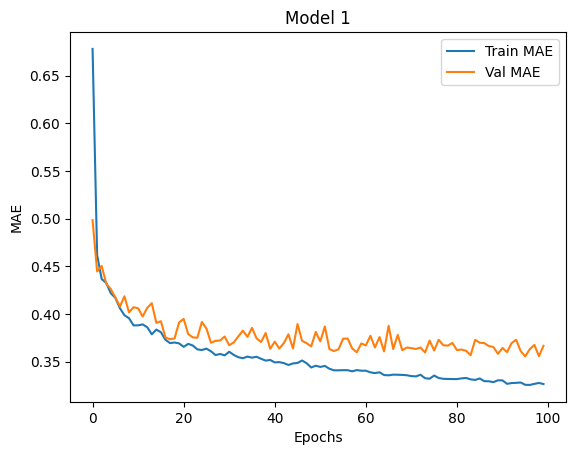

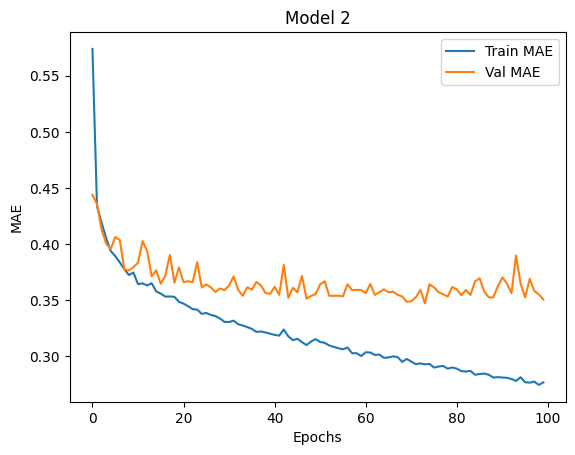

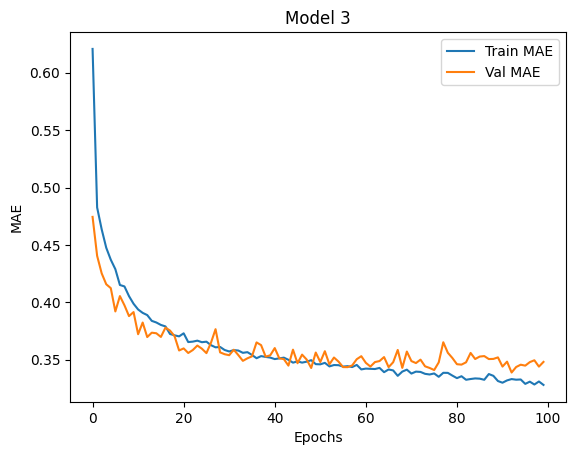

In [6]:
# Plot the MAE for each model
def plot_history(history, title):
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Val MAE')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()

plot_history(history_1, 'Model 1')
plot_history(history_2, 'Model 2')
plot_history(history_3, 'Model 3')


### Model Selection
We analyze the mean absolute error (MAE) of each model during training and validation. The model with the lowest validation MAE and a close alignment of training and validation MAE (indicating reduced overfitting) is selected as the final model.


In [7]:
# Combine training and validation data
X_train_final = np.concatenate((X_train, X_val), axis=0)
y_train_final = np.concatenate((y_train, y_val), axis=0)

# Train the selected model
best_model = build_model_3()  # Replace with the chosen model
best_model.fit(X_train_final, y_train_final, epochs=100, batch_size=32, verbose=1)

# Evaluate on the test set
test_loss, test_mae = best_model.evaluate(X_test, y_test, verbose=1)
print(f"Test MAE: {test_mae}")


Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.5241 - mae: 0.8184
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4545 - mae: 0.4823
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4052 - mae: 0.4535
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3964 - mae: 0.4419
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3665 - mae: 0.4303
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3529 - mae: 0.4194
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3422 - mae: 0.4106
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3303 - mae: 0.4051
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3342 - mae: 0.4013
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3122 - mae: 0.3911
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3107 - mae: 0.3860
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3119 - mae: 0.3897
Epoch 13/100


### Final Model Training and Testing
The best model is retrained on the combined training and validation sets for better generalization. It is then evaluated on the test set, with the final mean absolute error (MAE) reported to measure the model’s performance.


### Summary of Experiments
We experimented with different model architectures and regularization techniques to improve performance on the California housing dataset:
1. **Model Architectures**: We tested models with varying numbers of neurons and hidden layers.
2. **Regularization**: Dropout was used in one model to mitigate overfitting.
3. **Final Model Performance**: The selected model achieved a test MAE lower than the baseline of 0.3, demonstrating improved predictive accuracy.
